In [1]:
!pip install pandas numpy matplotlib seaborn folium

  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('US_Accidents_March23.csv')  # Adjust if filename differs
df.shape

(7728394, 46)

In [5]:
# Preview data
df.head()

# Check for missing values in important columns
df[['Start_Time', 'Weather_Condition', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Severity', 'Start_Lat', 'Start_Lng']].isnull().mean()

# Drop rows with null values in key columns
df = df.dropna(subset=['Start_Time'])

# Convert time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

In [6]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Hour'] = df['Start_Time'].dt.hour
df['Time_of_Day'] = df['Hour'].apply(get_time_of_day)

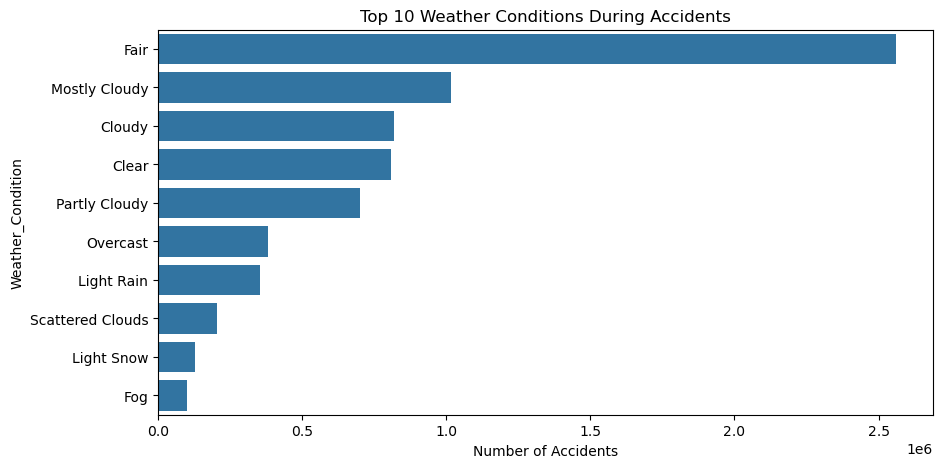

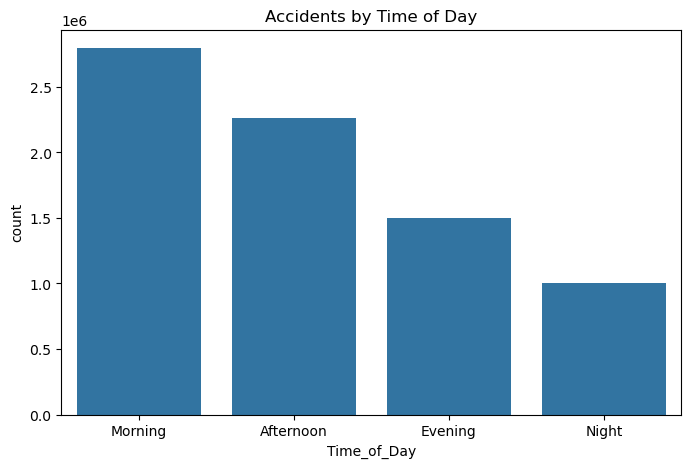

In [7]:
# Top weather conditions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Weather_Condition', order=df['Weather_Condition'].value_counts().iloc[:10].index)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.show()

# Group by Time of Day
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_of_Day', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Accidents by Time of Day')
plt.show()

In [12]:
# Create a heatmap using Folium for a sample of 50,000 rows
sample_df = df[['Start_Lat', 'Start_Lng']].sample(50000)

# Create base map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Center of US
HeatMap(sample_df.values.tolist(), radius=8).add_to(m)
m.save("accident_heatmap.html")

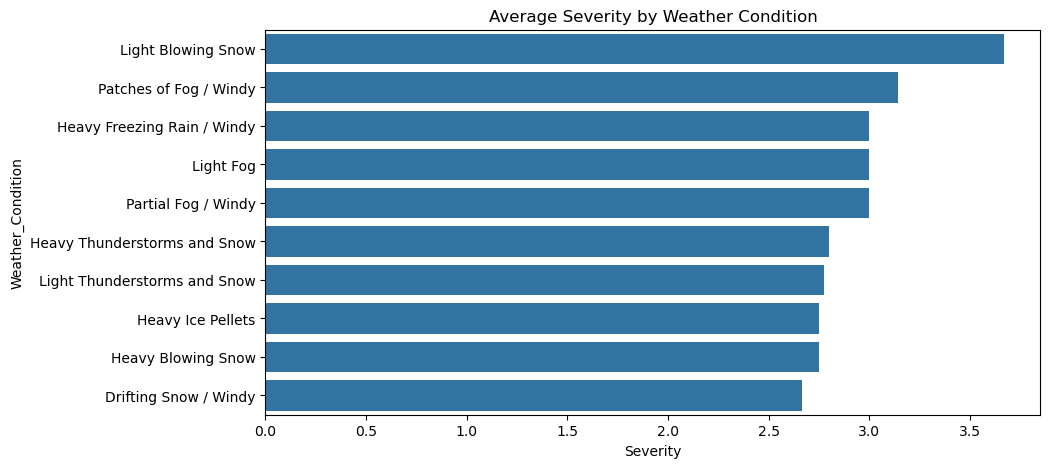

In [13]:
# Severity by Weather
plt.figure(figsize=(10, 5))
weather_severity = df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=weather_severity.values, y=weather_severity.index)
plt.title('Average Severity by Weather Condition')
plt.xlabel('Severity')
plt.show()

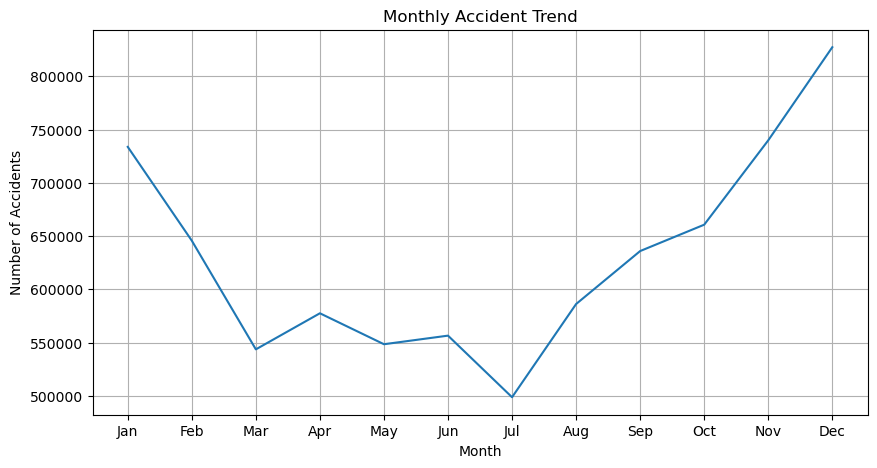

In [10]:
df['Month'] = df['Start_Time'].dt.month
monthly_accidents = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_accidents.index, y=monthly_accidents.values)
plt.xticks(ticks=np.arange(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Accident Trend')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

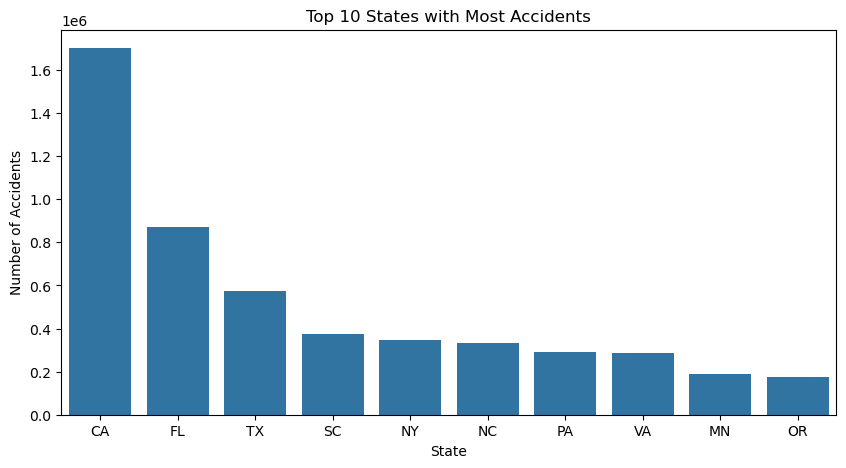

In [11]:
top_states = df['State'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()